In [41]:
import numpy as np
np.random.seed(1234)
import matplotlib.pyplot as plt

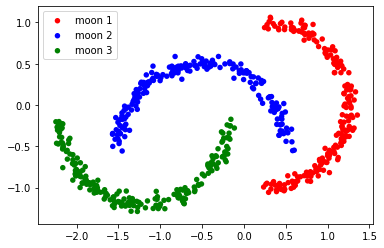

In [42]:
N = 200
t = np.random.rand(N) * np.pi
t.sort()

moon1 = np.column_stack((np.sin(t)+0.25, np.cos(t))) + 0.05 * np.random.randn(N,2)
moon2 = np.column_stack((np.cos(t), np.sin(t))) + 0.05 * np.random.randn(N,2) - 0.5
moon3 = np.column_stack((np.cos(t)-1.2, -np.sin(t)-0.2)) + 0.05 * np.random.randn(N,2)
moons = np.concatenate((moon1, moon2, moon3), 0)

m1 = plt.scatter(moon1[:,0], moon1[:,1], s=30, facecolors='r', edgecolors='none')
m2 = plt.scatter(moon2[:,0], moon2[:,1], s=30, facecolors='b', edgecolors='none')
m3 = plt.scatter(moon3[:,0], moon3[:,1], s=30, facecolors='g', edgecolors='none')
plt.legend((m1,m2,m3), ('moon 1', 'moon 2', 'moon 3'))
plt.show()

In [43]:
type(moons[1])

numpy.ndarray

In [5]:
u, s, vt = np.linalg.svd(moons)
vt.shape

(2, 2)

In [7]:
v = vt.transpose()
v

array([[-0.9462466 ,  0.32344609],
       [-0.32344609, -0.9462466 ]])

In [8]:
np.matmul(moons, v)

array([[-0.61116613, -0.85755153],
       [-0.6410853 , -0.88964608],
       [-0.57531518, -0.83060289],
       ...,
       [ 2.17303421, -0.51006912],
       [ 2.17597815, -0.48008347],
       [ 2.15645654, -0.47343566]])

In [2]:
from docx2tokens import docx_to_tokens
import os
from mxnet import gluon
from mxnet import nd
import gluonnlp as nlp
import re
import numpy as np
import matplotlib.pyplot as plt

In [9]:
tokens = docx_to_tokens(os.getcwd() + "\D2Jr_016003.docx")
print(tokens)

reading .docx at C:\Users\Yandong Li\Desktop\Spring 2020\CS 6241\hw2\D2Jr_016003.docx
['gray', 'today', 'name', 'tam', 'boggs', 'attorney', 'town', 'also', 'work', 'quimby', 'red', 'brough', 'represent', 'evins', 'okay', 'answer', 'judge', 'question', 'opinion', 'feel', 'death', 'penalty', 'answer', 'gowdy', 'sound', 'like', 'take', 'judge', 'instruction', 'six', 'come', 'group', 'earlier', 'remember', 'judge', 'say', 'presumption', 'innocence', 'person', 'presume', 'innocent', 'prove', 'guilty', 'instruct', 'tell', 'u', 'sit', 'right', 'person', 'innocent', 'hear', 'fact', 'explain', 'gowdy', 'mean', 'believe', 'person', 'innocent', 'presume', 'innocent', 'remember', 'judge', 'define', 'tell', 'presumption', 'innocence', 'take', 'person', 'presume', 'innocent', 'prove', 'guilty', 'believe', 'way', 'prove', 'somebody', 'guilty', 'bring', 'fact', 'put', 'testimony', 'jury', 'make', 'decision', 'feel', 'case', 'proceed', 'evidence', 'even', 'though', 'death', 'penalty', 'first', 'phase',

In [3]:
# create word embedding
# need to download, if it's the first time running this code
glove_6b50d = nlp.embedding.create('glove', source='glove.6B.50d')

In [4]:
directory = "C:\\Users\\Yandong Li\\Desktop\\Spring 2020\\Club\\court data\\LIWC Files for Evins Case\\Black Female Jurors"
BFJ_tokens = [];

for filename in os.listdir(directory):
    # check if it's a .docx file and not empty
    if filename.endswith(".docx") and os.stat(os.path.join(directory, filename)).st_size != 0:
        tokens = docx_to_tokens(os.path.join(directory, filename))
        BFJ_tokens.extend(tokens)

reading .docx at C:\Users\Yandong Li\Desktop\Spring 2020\Club\court data\LIWC Files for Evins Case\Black Female Jurors\D2Jr_016001.docx
reading .docx at C:\Users\Yandong Li\Desktop\Spring 2020\Club\court data\LIWC Files for Evins Case\Black Female Jurors\D2Jr_016019.docx
reading .docx at C:\Users\Yandong Li\Desktop\Spring 2020\Club\court data\LIWC Files for Evins Case\Black Female Jurors\D2Jr_016020.docx
reading .docx at C:\Users\Yandong Li\Desktop\Spring 2020\Club\court data\LIWC Files for Evins Case\Black Female Jurors\D2Jr_016026.docx
reading .docx at C:\Users\Yandong Li\Desktop\Spring 2020\Club\court data\LIWC Files for Evins Case\Black Female Jurors\D2Jr_016027.docx
reading .docx at C:\Users\Yandong Li\Desktop\Spring 2020\Club\court data\LIWC Files for Evins Case\Black Female Jurors\D2Jr_016048.docx
reading .docx at C:\Users\Yandong Li\Desktop\Spring 2020\Club\court data\LIWC Files for Evins Case\Black Female Jurors\D2Jr_016055.docx
reading .docx at C:\Users\Yandong Li\Desktop\Spr

In [6]:
vocab = nlp.Vocab(nlp.data.Counter(glove_6b50d.idx_to_token))
vocab.set_embedding(glove_6b50d)
A = vocab.embedding[BFJ_tokens]
# type of A is mxnet array

In [7]:
# convert mxnet array to np.array
A2 = np.zeros(A.shape)
for i in np.arange(0,9192):
    A2[i] = A[i].asnumpy()

In [8]:
u, s, vt = np.linalg.svd(A2)
vt.shape
v = vt.transpose()
PCs = np.matmul(A2, v)
PCs[:,1]

array([-0.4780303 , -0.03105642, -3.02292131, ...,  1.00999121,
       -0.30894819, -3.09017997])

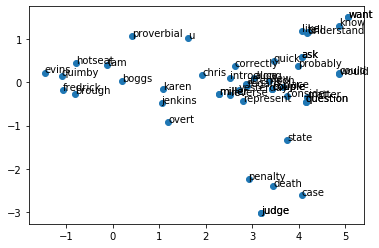

In [9]:
N = 50
fig, ax = plt.subplots()
ax.scatter(PCs[0:50,0], PCs[0:50,1])

for i, txt in enumerate(BFJ_tokens[0:50]):
    ax.annotate(txt, (PCs[i,0], PCs[i,1]))

plt.savefig('BFJwords.pdf')  

In [60]:
N = 50
fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))


PCs.shape

(9192, 50)

In [34]:
directory = "C:\\Users\\Yandong Li\\Desktop\\Spring 2020\\Club\\court data\\LIWC Files for Evins Case\\Black Female Jurors"
BFJ_tokens = [];

for filename in os.listdir(directory):
    # check if it's a .docx file and not empty
    if filename.endswith(".docx") and os.stat(os.path.join(directory, filename)).st_size != 0:
        tokens = docx_to_tokens(os.path.join(directory, filename))
        BFJ_tokens.extend(tokens)

reading .docx at C:\Users\Yandong Li\Desktop\Spring 2020\Club\court data\LIWC Files for Evins Case\Black Female Jurors\D2Jr_016001.docx
reading .docx at C:\Users\Yandong Li\Desktop\Spring 2020\Club\court data\LIWC Files for Evins Case\Black Female Jurors\D2Jr_016019.docx
reading .docx at C:\Users\Yandong Li\Desktop\Spring 2020\Club\court data\LIWC Files for Evins Case\Black Female Jurors\D2Jr_016020.docx
reading .docx at C:\Users\Yandong Li\Desktop\Spring 2020\Club\court data\LIWC Files for Evins Case\Black Female Jurors\D2Jr_016026.docx
reading .docx at C:\Users\Yandong Li\Desktop\Spring 2020\Club\court data\LIWC Files for Evins Case\Black Female Jurors\D2Jr_016027.docx
reading .docx at C:\Users\Yandong Li\Desktop\Spring 2020\Club\court data\LIWC Files for Evins Case\Black Female Jurors\D2Jr_016048.docx
reading .docx at C:\Users\Yandong Li\Desktop\Spring 2020\Club\court data\LIWC Files for Evins Case\Black Female Jurors\D2Jr_016055.docx
reading .docx at C:\Users\Yandong Li\Desktop\Spr